# One-Dimensional Exponential Speckle

**Scott Prahl**

**June 2018**


In [1]:
# Excute this cell first (click in it and press shift-return)
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt
#from scipy import signal

import pyspeckle as speckle

# To solve "No module named 'pyspeckle'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pyspeckle

## Test average and standard deviation

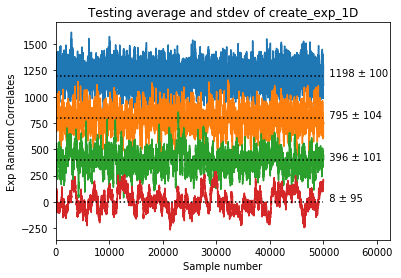

In [2]:
M=50000
x=np.linspace(0,M-1,M)
stdev=100

avg=1200
y = speckle.create_exp_1D(M,avg,stdev,20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=800
y = speckle.create_exp_1D(M,avg,stdev,50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=400
y = speckle.create_exp_1D(M,avg,stdev,100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(x,y)
plt.plot([0,M],[avg,avg],':k')

avg=0
y = speckle.create_exp_1D(M,avg,stdev,500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

plt.xlim(0,M*1.25)
plt.title("Testing average and stdev of create_exp_1D")
plt.xlabel('Sample number')
plt.ylabel('Exp Random Correlates')
plt.show()

## Test autocorrelation shape

The points should be distributed to have the shape
$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$

In [3]:
def autocorr(x):
    """
    Find the autocorrelation of the array x
    
    This is a little different from the standard autocorrelation because 
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    """    
    mean = np.mean(x)
    x -= mean
    result = np.correlate(x, x, mode='full')
# could also use the faster(?)
#   result = signal.fftconvolve(sig, sig[::-1], mode='full')

    mx = np.max(result)
    middle = len(result)//2
    return result[middle:]/mx

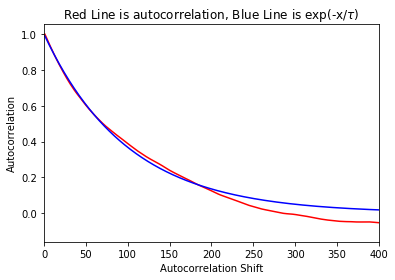

In [6]:
M= 50000
tau = 100

x = np.linspace(1,M+1,M)
y = speckle.create_exp_1D(M,200,100,tau)

ac = autocorr(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*tau)
plt.plot(x,np.exp(-x/tau),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/$\tau$)")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()